Preparación de modelos base usando estimadores
===

In [10]:
##
## Preparación
##
library(tensorflow)
library(tfestimators)


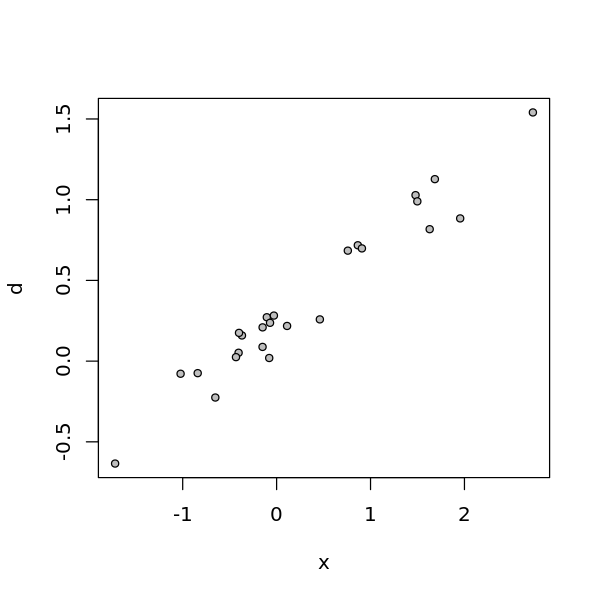

In [11]:
##
## datos del problema propuesto
##
x <- c(-0.6525,   2.7287,   1.6849,  -0.1042,  -0.3690,  
       -0.0787,   0.4605,  -0.8402,  -0.0701,  -0.4003,   
        1.4793,  -1.7196,   1.4982,   0.8647,   0.7583,   
        1.9546,   0.1115,  -0.4049,  -0.1491,  -1.0224,  
       -0.4326,   0.9082,   1.6299,  -0.1497,  -0.0290)

d <- c(-0.2255,   1.5404,   1.1272,   0.2718,   0.1589,
        0.0193,   0.2585,  -0.0745,   0.2373,   0.1750,
        1.0281,  -0.6345,   0.9896,   0.7177,   0.6843,
        0.8840,   0.2178,   0.0518,   0.2091,  -0.0782,
        0.0247,   0.6982,   0.8172,   0.0880,   0.2821)

options(repr.plot.width=5, repr.plot.height=5)
plot(x, d, type = 'p', pch = 21, bg = 'gray', cex = 0.8)

## Funciones de entrada a los estimadores

In [16]:
## Indica que la columna 'x' es numérica
cols <- feature_columns(
    column_numeric("x")
)

ERROR: Error in py_get_attr_impl(x, name, silent): AttributeError: 'module' object has no attribute 'numeric_column'


In [12]:
## Función de entrada para el estimador.
## Debe retornar una tupla con (entradas, salida).
## Note que features es un diccionario que contine 
## una paraja clave-valor por cada variable 
## independiente
input_fn_train <- function() 
    {
    features <- dict('x'=np.array(x))
    labels <- np.array(d)
    return(list(features, labels))
    }


## Esta función es igual que la anterior, pero 
## retorna únicamente el data.frame de variables
## independientes
input_fn_predict <- function()
    {
    feature_columns = list(x=x)
    return(features)
    }

ERROR: Error in py_get_attr_impl(x, name, silent): AttributeError: 'module' object has no attribute 'numeric_column'


## Linear Regressor

In [5]:
## Construye el estimador lineal, cuya salida es
## el resultado de la regresión lineal entre
## x y y.
regressor <- tf.estimator.LinearRegressor(
    feature_columns = cols)

## Entrenamiento
regressor %>% train(
    input_fn=input_fn_train,
    steps=100)

## Pronostica para nuevos valores. En este
## caso se usa la misma función de entrada que
## para el entrenamiento.
results <- regressor %>% predict(
    input_fn=input_fn_predict)

Pronosticos:
  -0.6525   -0.0571
   2.7287    1.4798
   1.6849    1.0054
  -0.1042    0.1922
  -0.3690    0.0718
  -0.0787    0.2038
   0.4605    0.4488
  -0.8402   -0.1424
  -0.0701    0.2077
  -0.4003    0.0576
   1.4793    0.9119
  -1.7196   -0.5421
   1.4982    0.9205
   0.8647    0.6326
   0.7583    0.5842
   1.9546    1.1279
   0.1115    0.2902
  -0.4049    0.0555
  -0.1491    0.1718
  -1.0224   -0.2252
  -0.4326    0.0429
   0.9082    0.6523
   1.6299    0.9804
  -0.1497    0.1715
  -0.0290    0.2263

Métricas de error
  average_loss    :     0.0129
  global_step     :   100.0000
  label/mean      :     0.3787
  loss            :     0.3213
  prediction/mean :     0.3787



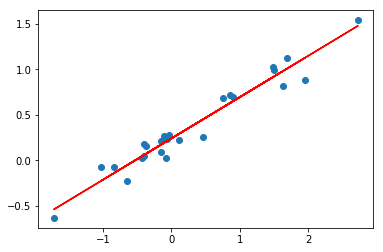

In [5]:
## Imprime los resultados.
forecasts <- c()
print('Pronosticos:')
for i, value in zip(x, results):
    ## Value es un diccionario por cada posible valor de x.
    ## El contenido de la clave predictions es un vector.
    print('  {:7.4f}   {:7.4f}'.format(i, value['predictions'][0]))
    
    ## Se almacenan los valores pronosticodos en una lista
    ## para poder graficarlos 
    forecasts += value['predictions'].tolist()

## Grafica los puntos de la muestra de datos
plot(x, d, 'o')

## Grafica los pronósticos del modelo
lines(x, forecasts, '-', color = 'red');

## Imprime los estadísticos de error.
metrics <- regressor.evaluate(input_fn=input_fn_train, steps=1)
print('')
print('Métricas de error')
for key in sorted(metrics.keys()):
    print("  {:16s}: {:10.4f}".format(key, metrics[key]))
print('')